In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
#Удаление столбца RowNumber
churn_data = churn_data.drop(['RowNumber'], axis=1)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

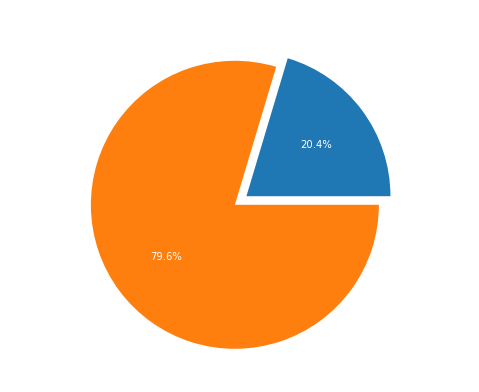

In [3]:
exited_clients = churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()
labels_client = ['Ушедшие клиенты', 'Лояльные клиенты']
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
plt.title("Cоотношение ушедших и лояльных клиентов", size = 15, color = 'white')
axes.pie(
    exited_clients,
    labels=labels_client,
    autopct='%.1f%%',
    explode = [0.1, 0],
    textprops={'color':"w"} 
);

Вывод: согласно графика количество ушедших клиентов составляет 20.4% от общего числа клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

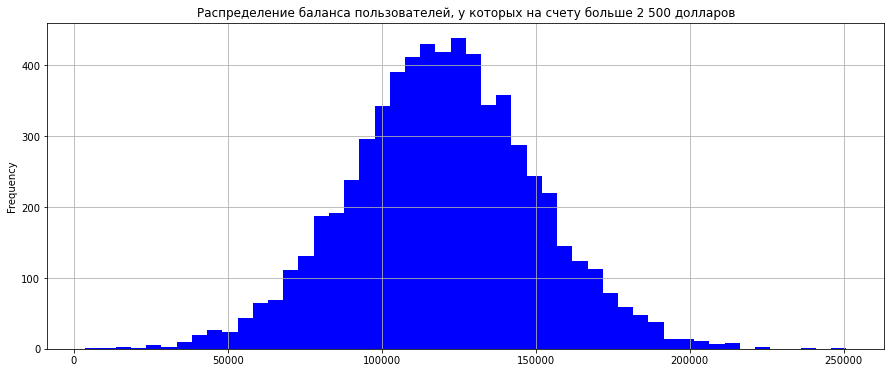

In [4]:
churn_data.Balance[churn_data['Balance']>2500].plot(
    kind='hist',
    figsize=(15, 6),
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
    grid = True,
    color = 'blue',
    bins=50
);

Вывод: пик гистограммы составляет порядка 710 пользователей с балансом порядка 125000. При этом на диапазон от 100000 до 150000 приходится по 400-700 пользователей. Также есть не значительное количество пользователей с балансом 200-250 тыс. Порядка 3500 имеют баланс < 2500 долларов (по заданию не требуется).

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

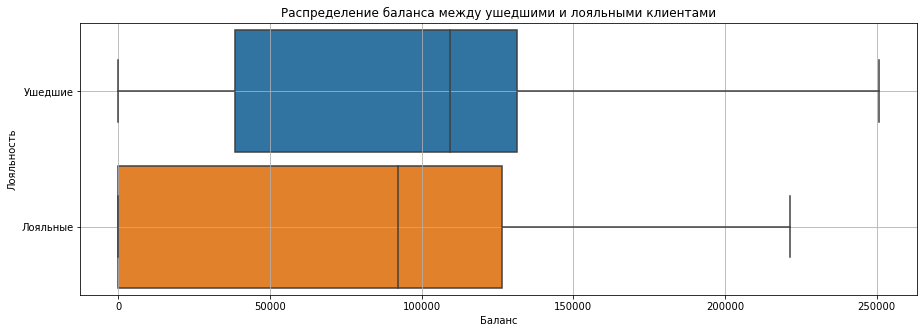

In [12]:
churn_data['Отток'] = churn_data['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')
churn_data['Активность'] = churn_data['IsActiveMember'].apply(lambda x: 'Активные' if x == 1 else 'Не активные')

fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Отток',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса между ушедшими и лояльными клиентами');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Вывод: медианное значение, 75% квантиль и максимальное значение по балансу на банковском счете больше у ушедших клиентов, при этом величина баланса (ящика с усами) больше лояльных клиентов. Также у лояльных клиентов 25% квантиль находится у нулевых значений. Возможно отток клиентов связан с накоплением на балансе определенной суммы и дальнейшей покупкой товаров и услуг. Также возможно, что содержать деньги на счете другого банка выгоднее, когда балансе превышает медианное значение  ушедших клиентов согласно графика.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

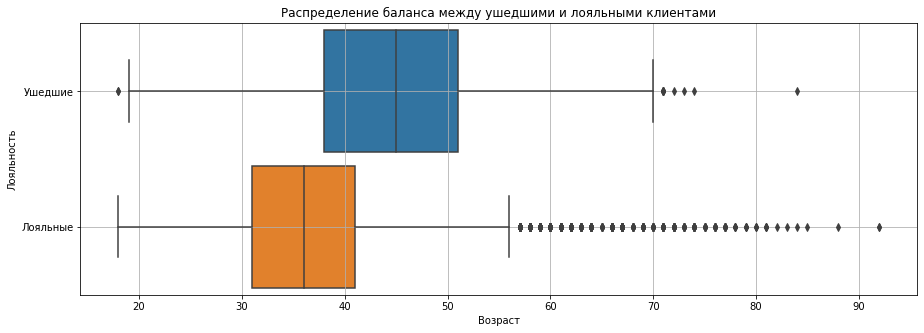

In [14]:
fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Отток',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса между ушедшими и лояльными клиентами');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Вывод: медианный возраст лояльных клиентов составляет 35 лет, а медианный возраст ушедших клиентов - 45 лет. Число потенциальных выбросов по возрасту среди лояльных клиентов больше, чем среди ушедших. Для влияния на решения клиентов с целью сохранения лояльности банку стоит обратить внимание на возрастную группу 40-50 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

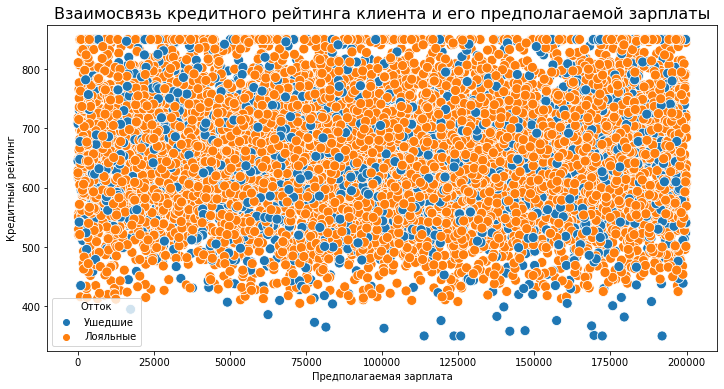

In [15]:
fig = plt.figure(figsize=(12, 6))
scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Отток',
    s=100,
    sizes=(50, 300)
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг');

Вывод: согласно графика прямая взаимосвязь кредитного рейтинга и предполагаемой зарплаты отсутствует

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

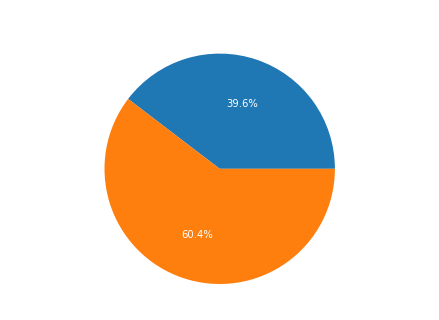

In [3]:
exited_gender = churn_data.Exited[churn_data['Gender']=='Male'].mean()*100, churn_data.Exited[churn_data['Gender']=='Female'].mean()*100
labels_gender = ['Мужчины', 'Женщины']
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])
plt.title("Cоотношение ушедших клиентов: мужчин и женщин", size = 15, color = 'white')
axes.pie(
    exited_gender,
    labels=labels_gender,
    autopct='%.1f%%',
    explode = [0, 0],
    textprops={'color':"w"},
);

Вывод: в оттоке клиентов банка женщин уходит больше чем мужчин

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

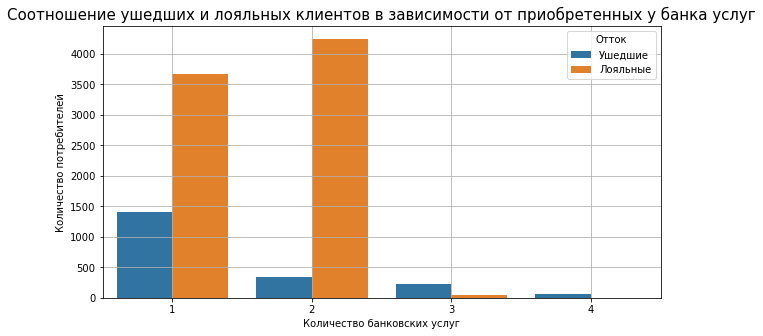

In [16]:
fig = plt.figure(figsize=(10, 5))
barplot1 = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y=churn_data.index,
    hue='Отток',
    estimator=len
)
barplot1.set_title('Соотношение ушедших и лояльных клиентов в зависимости от приобретенных у банка услуг', size = 15)
barplot1.set_xlabel('Количество банковских услуг')
barplot1.set_ylabel('Количество потребителей')
barplot1.grid();

Вывод: с увеличением количества банковских услуг больше 2 резко падает количество лояльных клиентов. Также при количестве банковских услуг равном 2, отношение ушедших клиентов к лояльным наименьшее. При количестве услуг равном 1 количество ушедших клиентов наибольшее. 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:

fig = px.sunburst(data_frame= churn_data,
                  path=['Активность', 'Отток'],
                  values=churn_data.index.value_counts(),
                  color='Активность',
                  title='Структура лояльности клиентов с учетом статуса активности',                                          
)

fig.update_traces(textinfo = 'label+percent entry')
fig.show()

Вывод: среди активных пользователей отток меньше чем среди неактинвых. Для уменьшения оттока среди неактивных, необходимо наращивать вовлеченность клиентов в более частое взаимодействие с банком, тем самым повышая активность. Например предложение о подключении банковских услуг или возможности производства оплаты сторонних услуг через банк.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [18]:
choropleth_data = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].mean()

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 1], 
    title='Картограмма ушедших клиентов', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

Вывод: согласно картограммы наибольшее число ушедших клиентов находится в Германии. Учитывая графики возраста и баланса, возможно отток связан с появлением возможности у граждан Германии для путешествий. Возможно банковский сектор в Германии более развит для перехода в иной банк под более выгодные условия.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [69]:
#Создание признака CreditScoreCat
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data ['CreditScore'].apply(get_credit_score_cat)

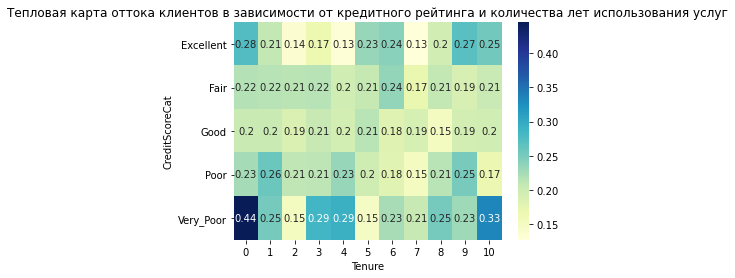

In [79]:
churn_pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
heatmap = sns.heatmap(data=churn_pivot, cmap='YlGnBu', annot = True)
heatmap.set_title('Тепловая карта оттока клиентов в зависимости от кредитного рейтинга и количества лет использования услуг', fontsize=12);

Вывод: согласно тепловой карты наиболее часто уходят категории клиентов с кредитным рейтингом Very_Poor и использованием услуг менее года. Следующая категория: кредитный рейтинг Very_Poor и использование услуг 10 лет.
В целом по категориям Very_Poor и Poor наблюдается наибольший отток.